<a href="https://colab.research.google.com/github/chlwldns00/zerobase/blob/main/02_HR_Visulization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Zerobase Course/실습/HR-Employee-Attrition.csv")
df

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8


<Axes: >

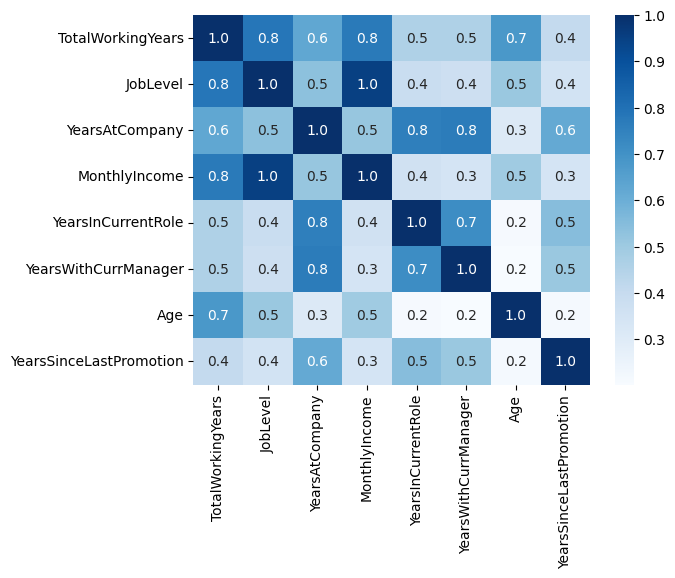

In [ ]:
top8_cols = df.select_dtypes(include='int64').corr().sum().sort_values(ascending=False)[:8].index.tolist()
sns.heatmap(df[top8_cols].corr(), annot=True, fmt='.1f', cmap='Blues')

# Simple Matplotlib Bar Graph

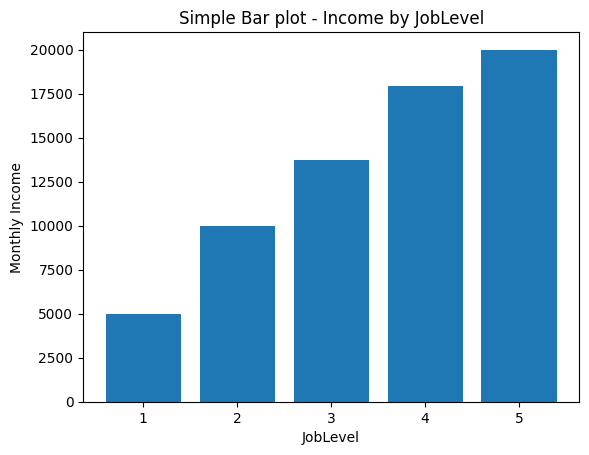

In [ ]:
# Simple version - Matplotlib
plt.title('Simple Bar plot - Income by JobLevel')
plt.bar(df['JobLevel'], df['MonthlyIncome']) #plt.bar(x, y)
plt.xlabel('JobLevel')
plt.ylabel('Monthly Income')
plt.show()

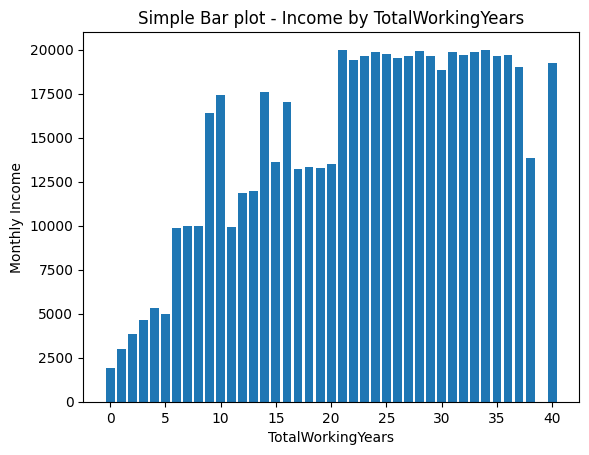

In [ ]:
# Simple version - Matplotlib
plt.title('Simple Bar plot - Income by TotalWorkingYears')
plt.bar(df['TotalWorkingYears'], df['MonthlyIncome']) #plt.bar(x, y)
plt.xlabel('TotalWorkingYears')
plt.ylabel('Monthly Income')
plt.show()

# Bar Graph with FacetGrid

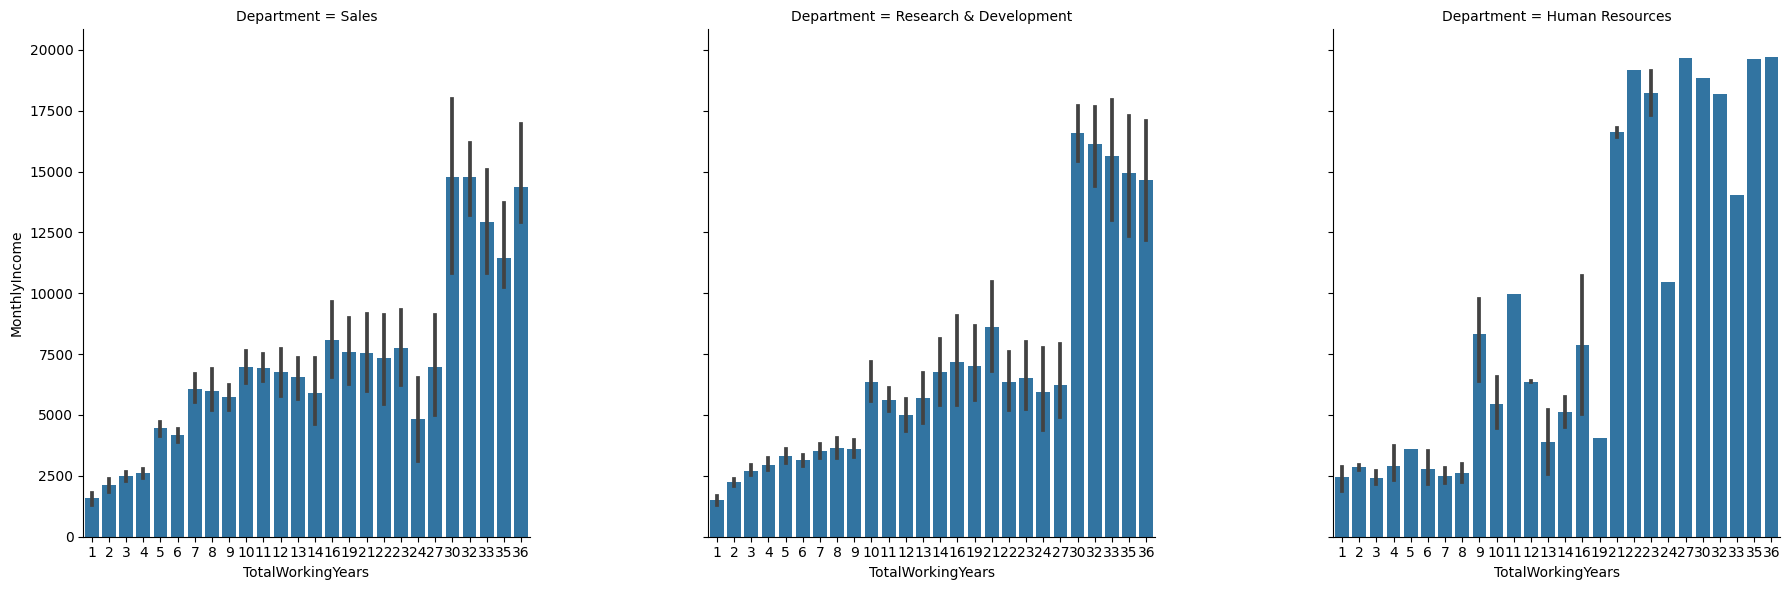

In [ ]:
facet = sns.FacetGrid(df, col='Department', height=6)
facet.map_dataframe(sns.barplot, x='TotalWorkingYears', y='MonthlyIncome')

facet = facet.fig.subplots_adjust(wspace=.4, hspace=.2)

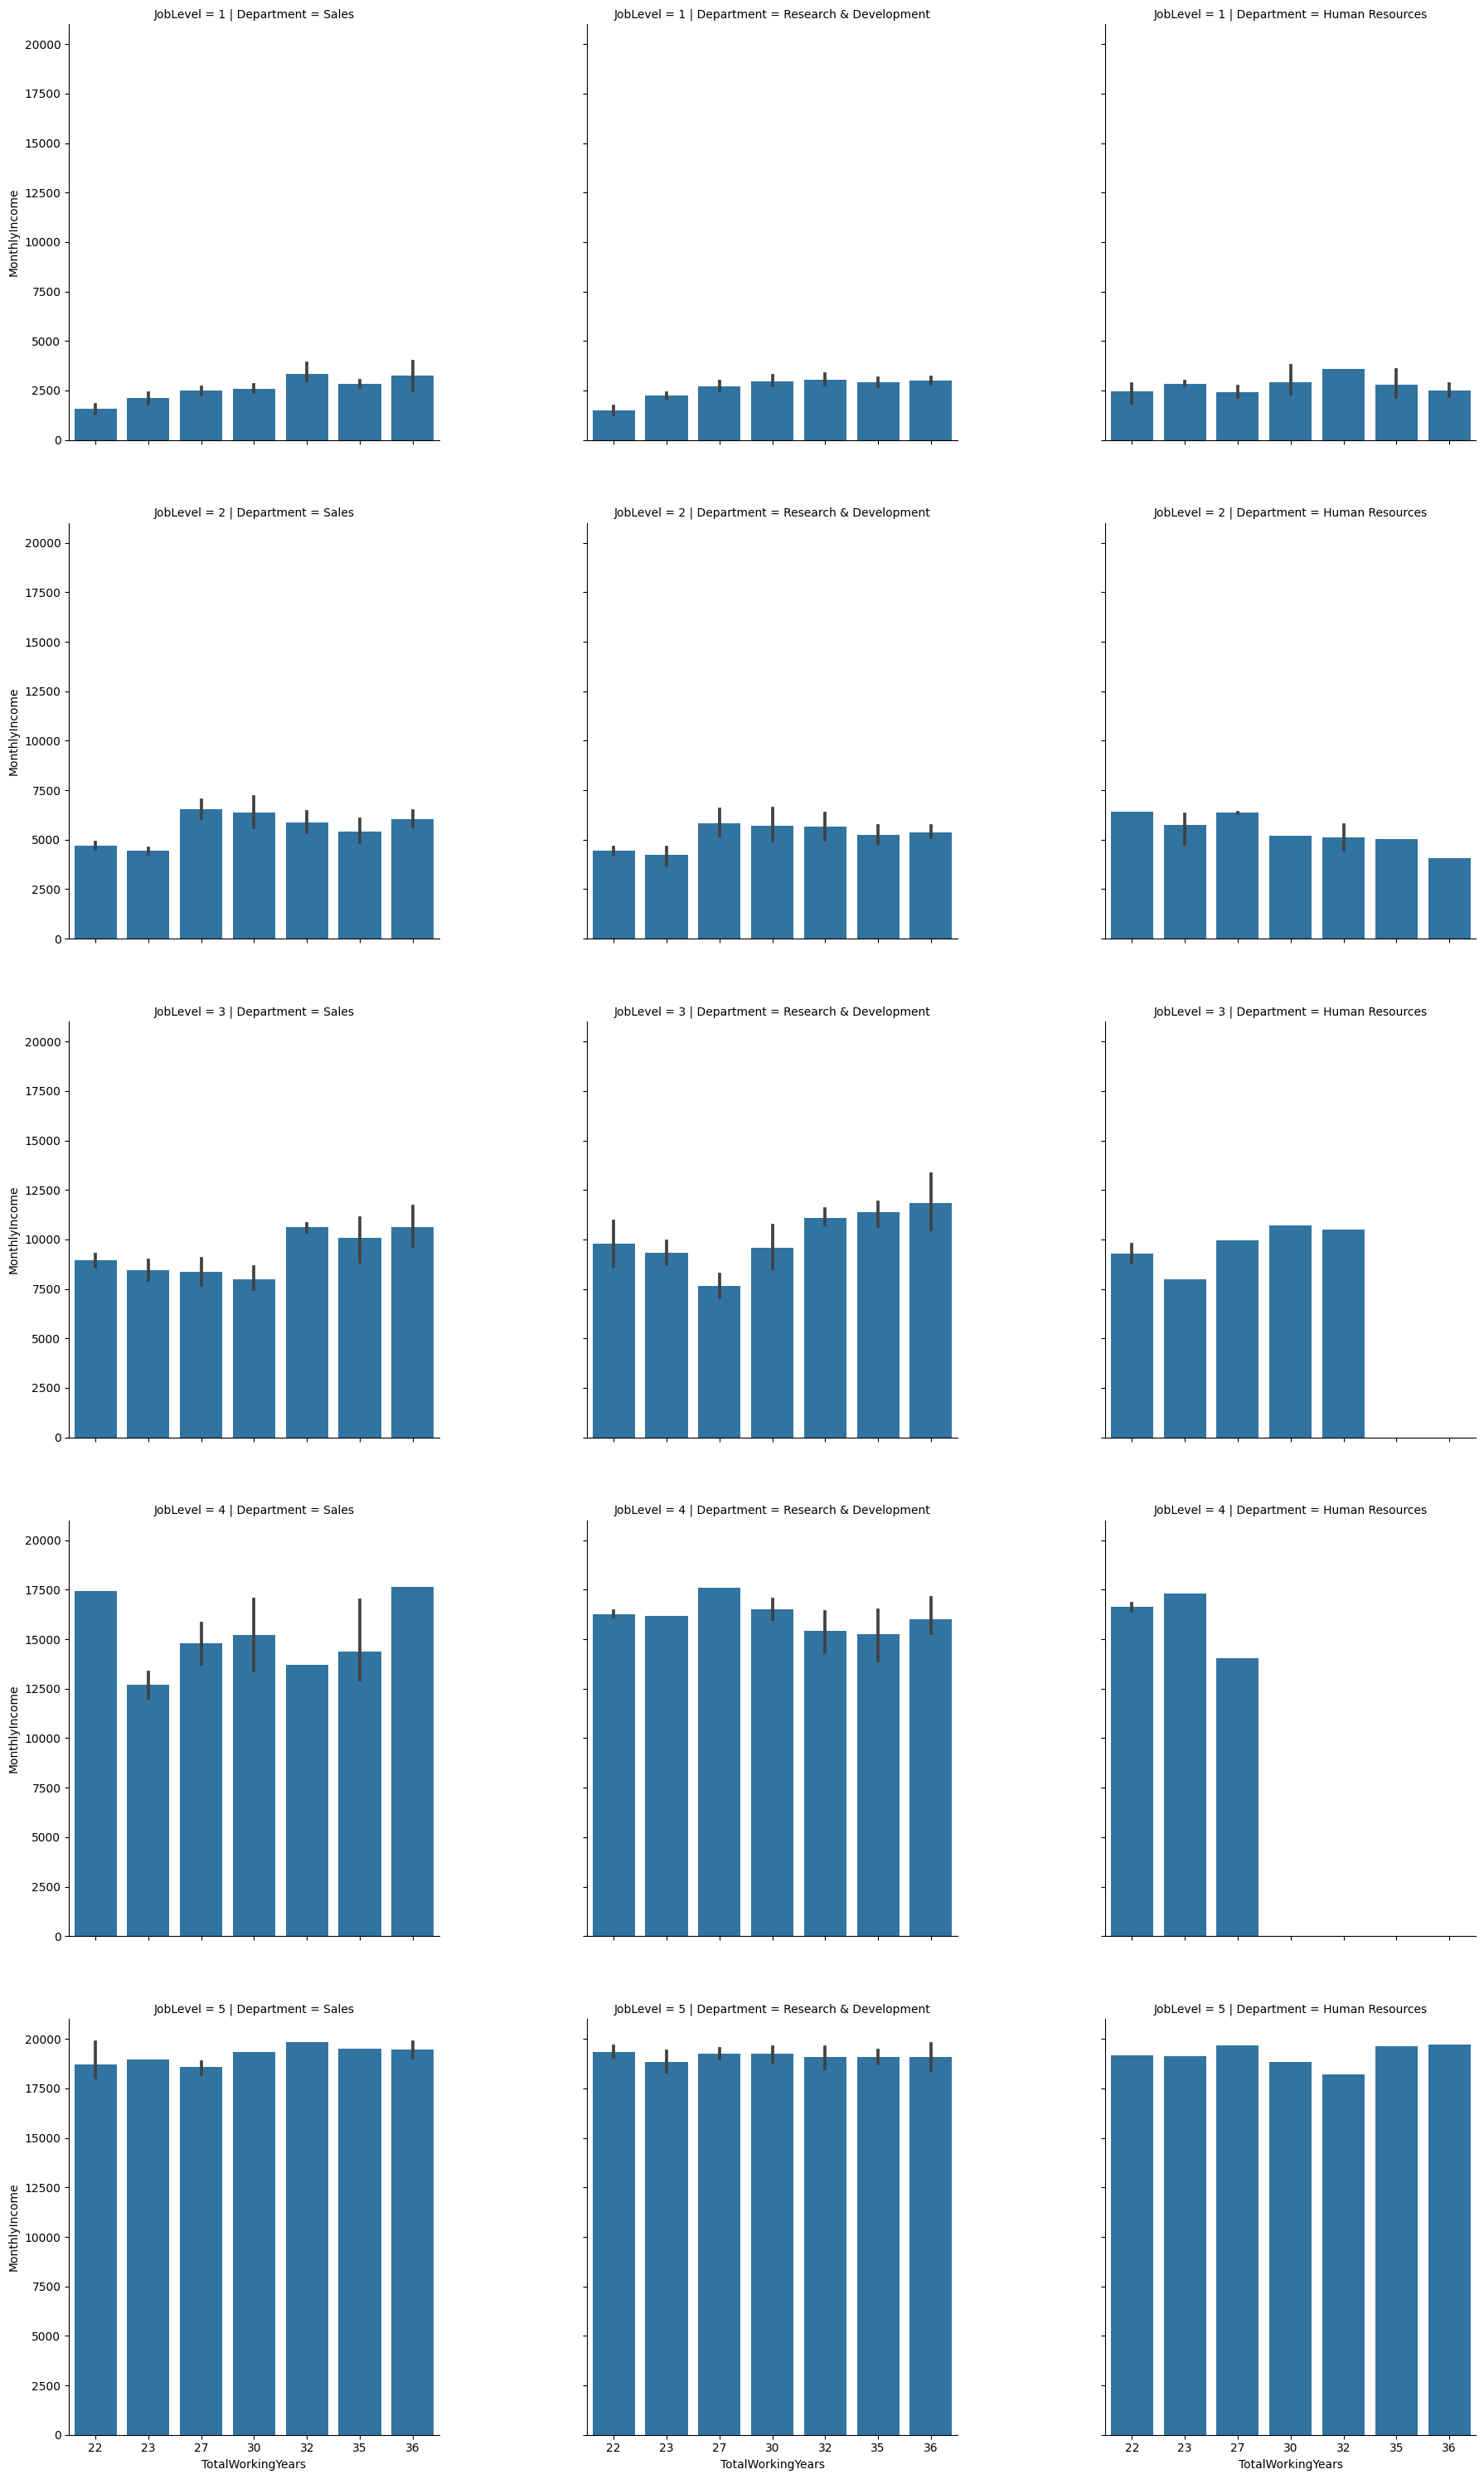

In [ ]:
facet = sns.FacetGrid(df, col='Department', row='JobLevel', height=6)
facet.map_dataframe(sns.barplot, x='TotalWorkingYears', y='MonthlyIncome')

facet = facet.fig.subplots_adjust(wspace=.4, hspace=.2)

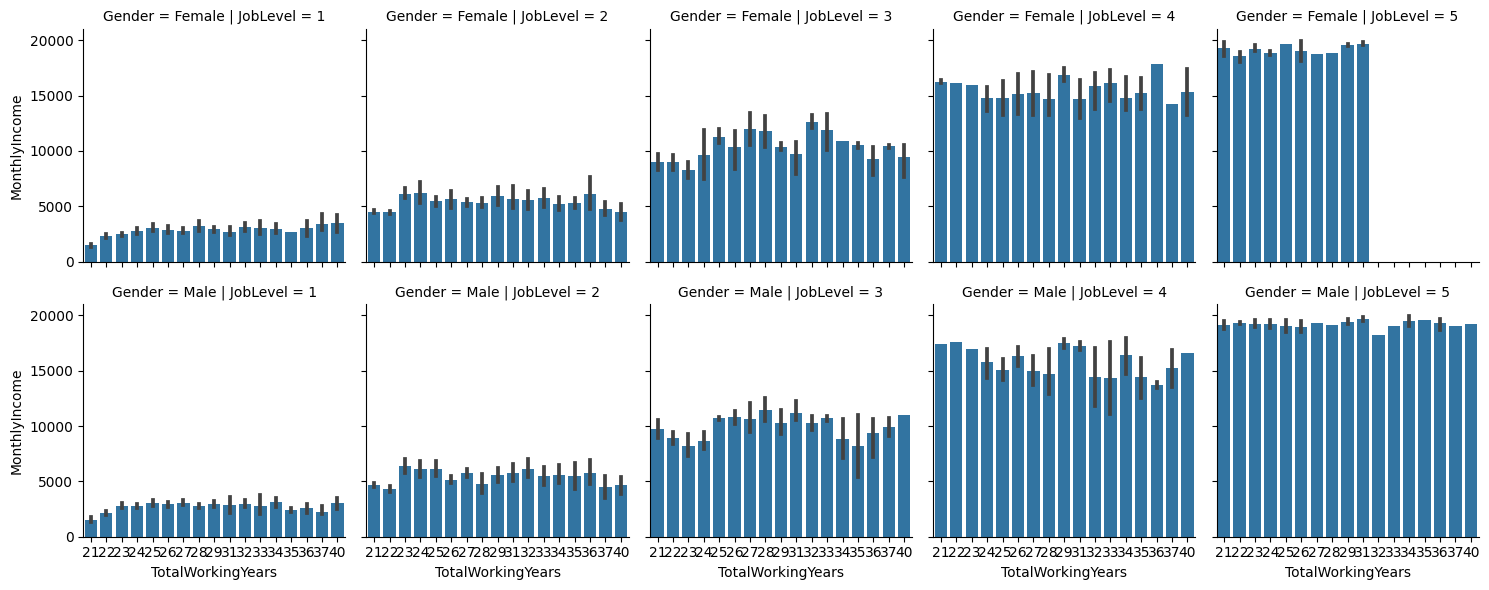

In [ ]:
facet = sns.FacetGrid(df, col='JobLevel', row='Gender', height=3)
facet.map_dataframe(sns.barplot, x='TotalWorkingYears', y='MonthlyIncome')
plt.show()

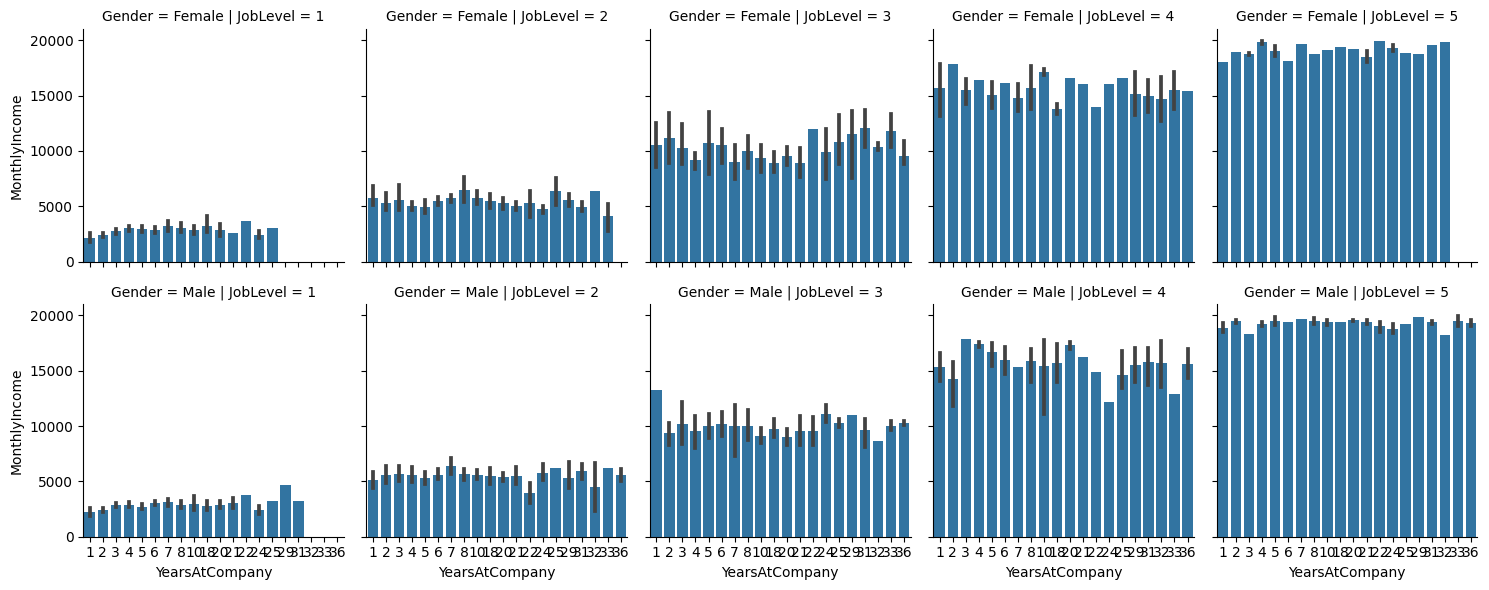

In [ ]:
facet = sns.FacetGrid(df, col='JobLevel', row='Gender', height=3)
facet.map_dataframe(sns.barplot, x='YearsAtCompany', y='MonthlyIncome')
plt.show()



---





---



# More Graphs with FacetGrid
### Regplot - scatter format
### Hue (legend 범례 추가)

<Axes: xlabel='Age', ylabel='MonthlyIncome'>

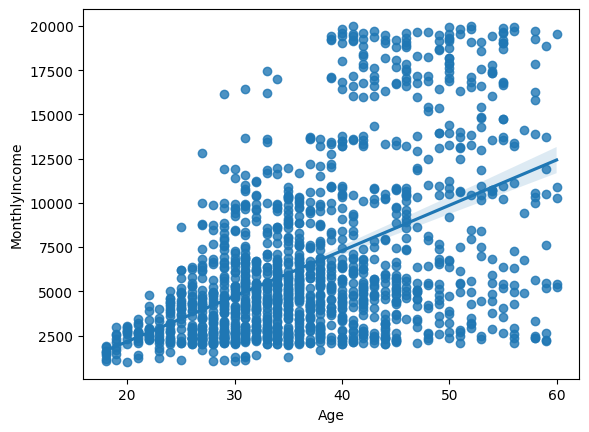

In [ ]:
sns.regplot(df, x='Age', y='MonthlyIncome')

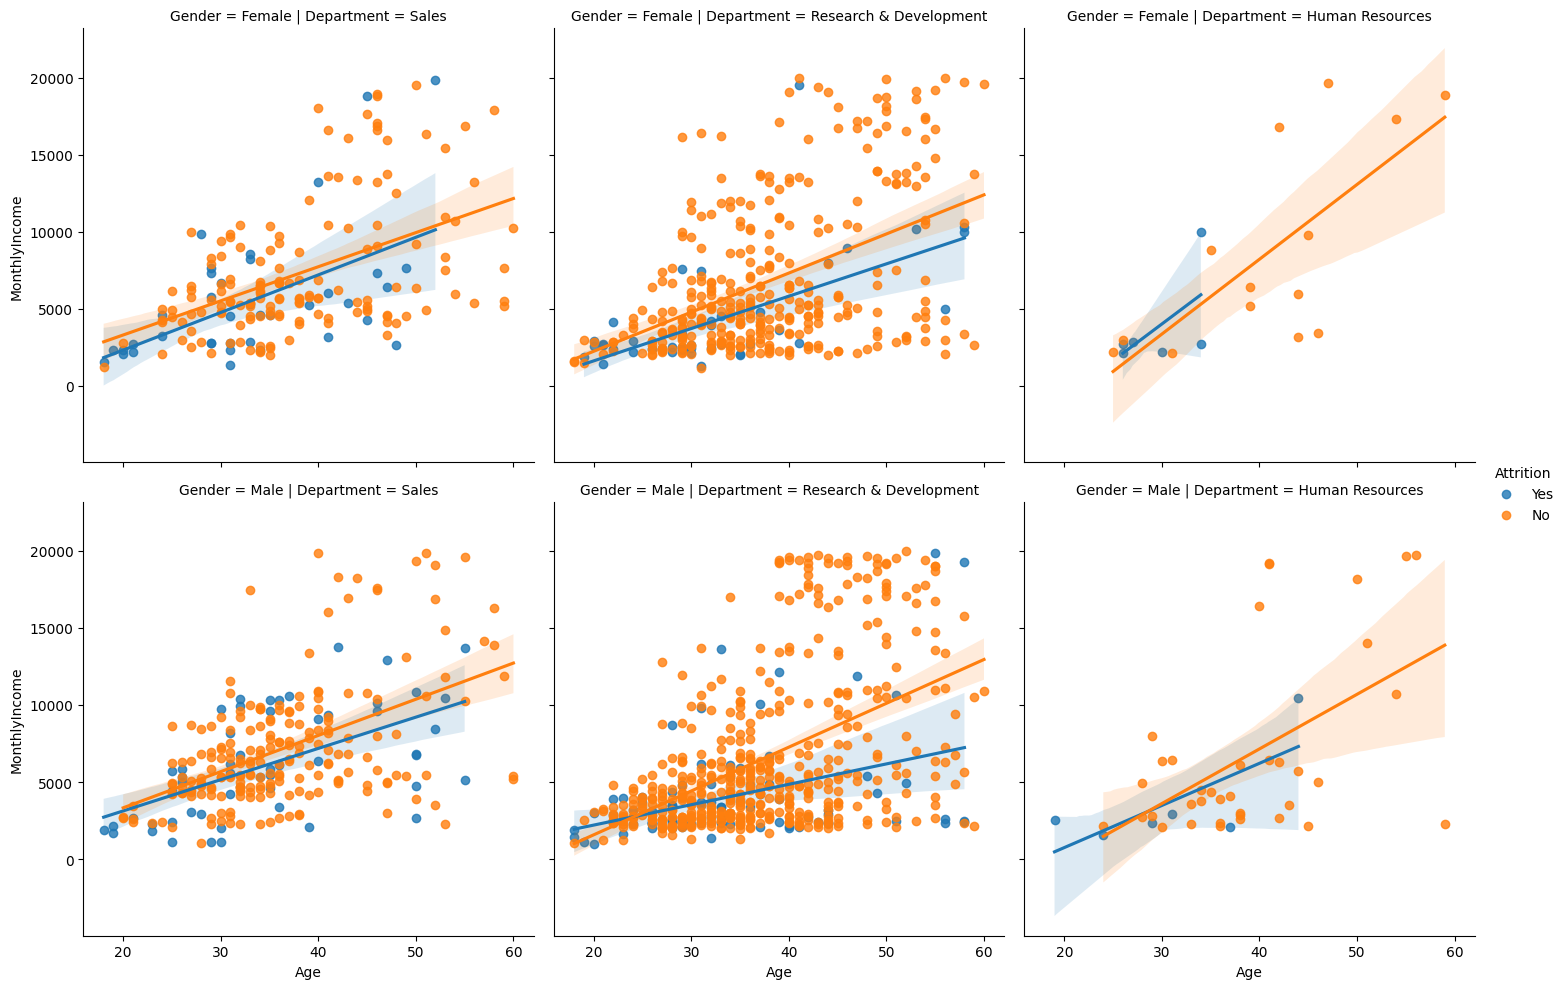

In [ ]:
# Attrition Yes와 No에 어떤 차이가 있나? -- hue 추가
facet = sns.FacetGrid(df, col='Department', row='Gender', hue='Attrition', height=5)
facet = facet.map_dataframe(sns.regplot, x='Age', y='MonthlyIncome')
facet = facet.add_legend()

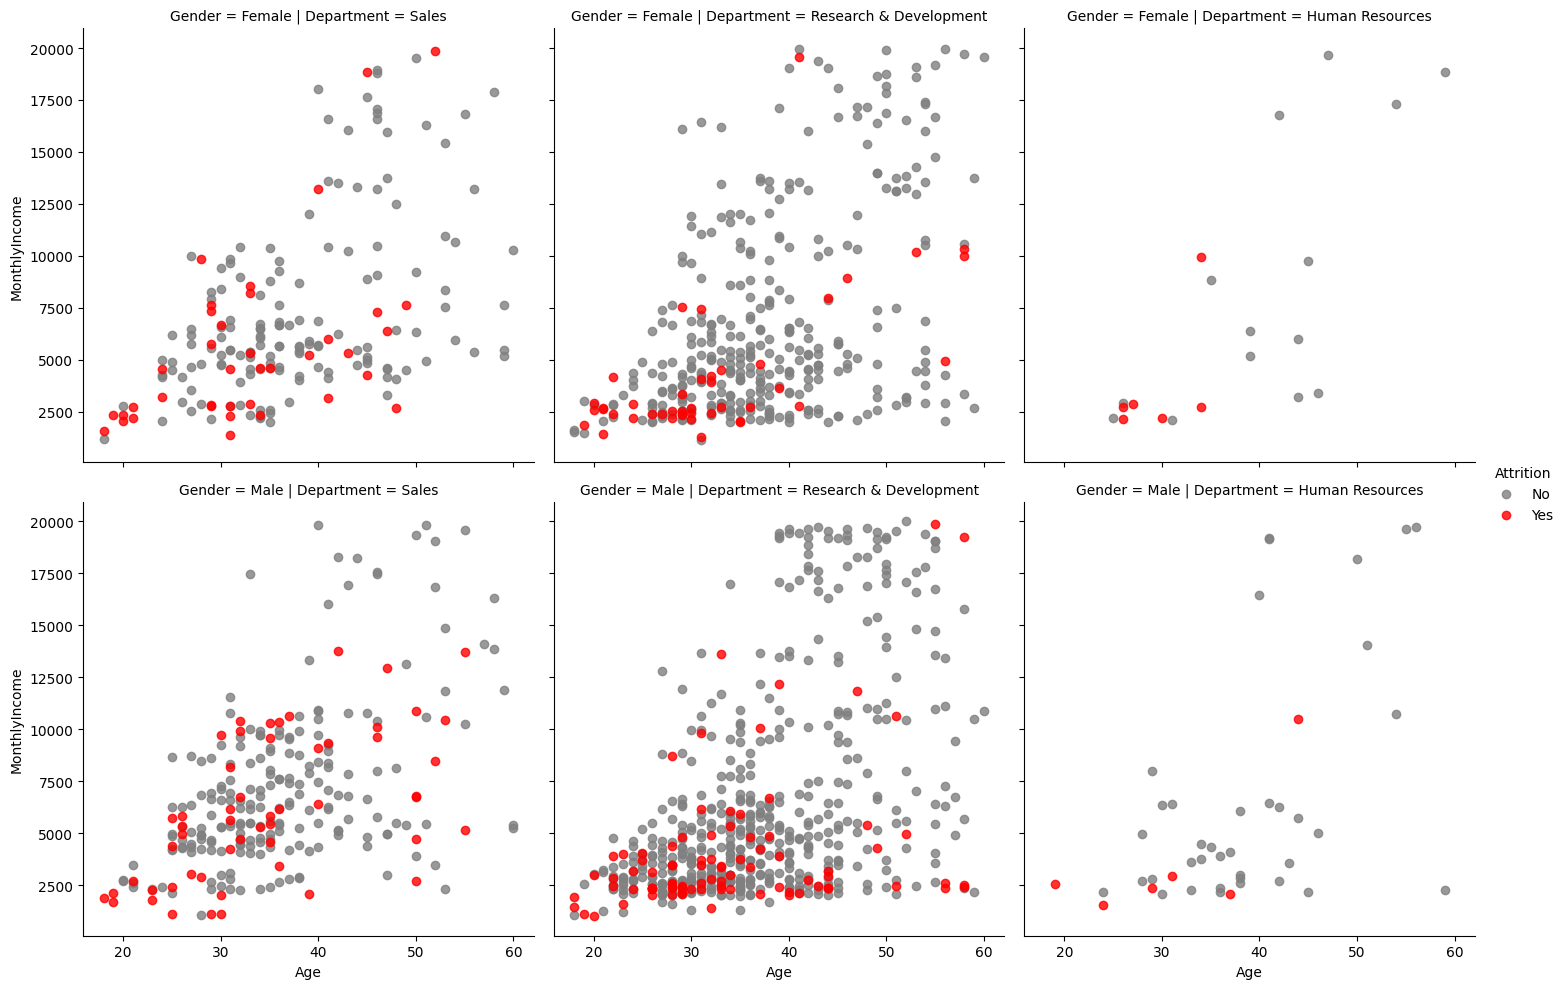

In [ ]:
facet = sns.FacetGrid(df, col='Department', row='Gender', hue='Attrition', height=5, hue_order=['No','Yes'], palette={'Yes':'red', 'No':'gray'})
facet = facet.map_dataframe(sns.regplot, x='Age', y='MonthlyIncome', fit_reg=False)
facet = facet.add_legend()

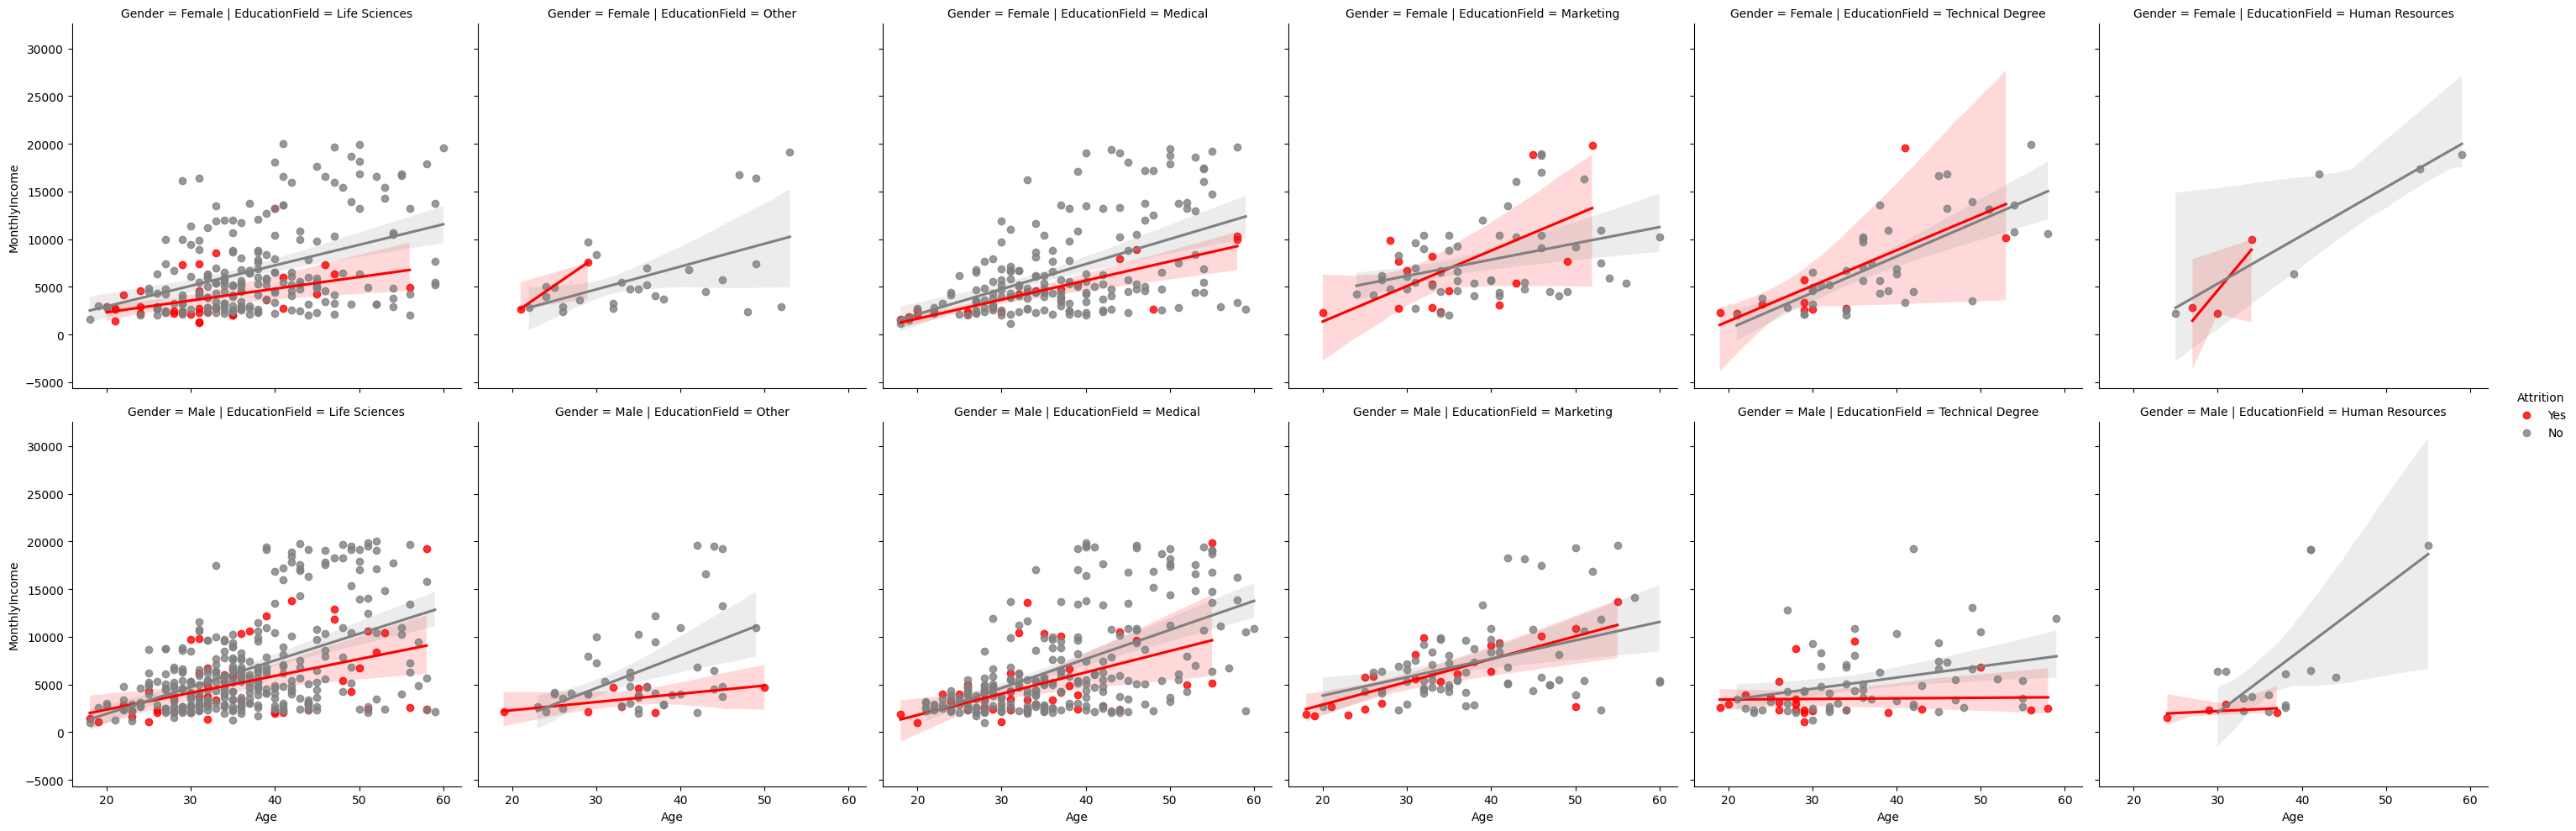

In [ ]:
facet = sns.FacetGrid(df, col='EducationField', row='Gender', hue='Attrition', height=5, palette={'Yes':'red', 'No':'gray'})
facet = facet.map_dataframe(sns.regplot, x='Age', y='MonthlyIncome')
facet = facet.add_legend()

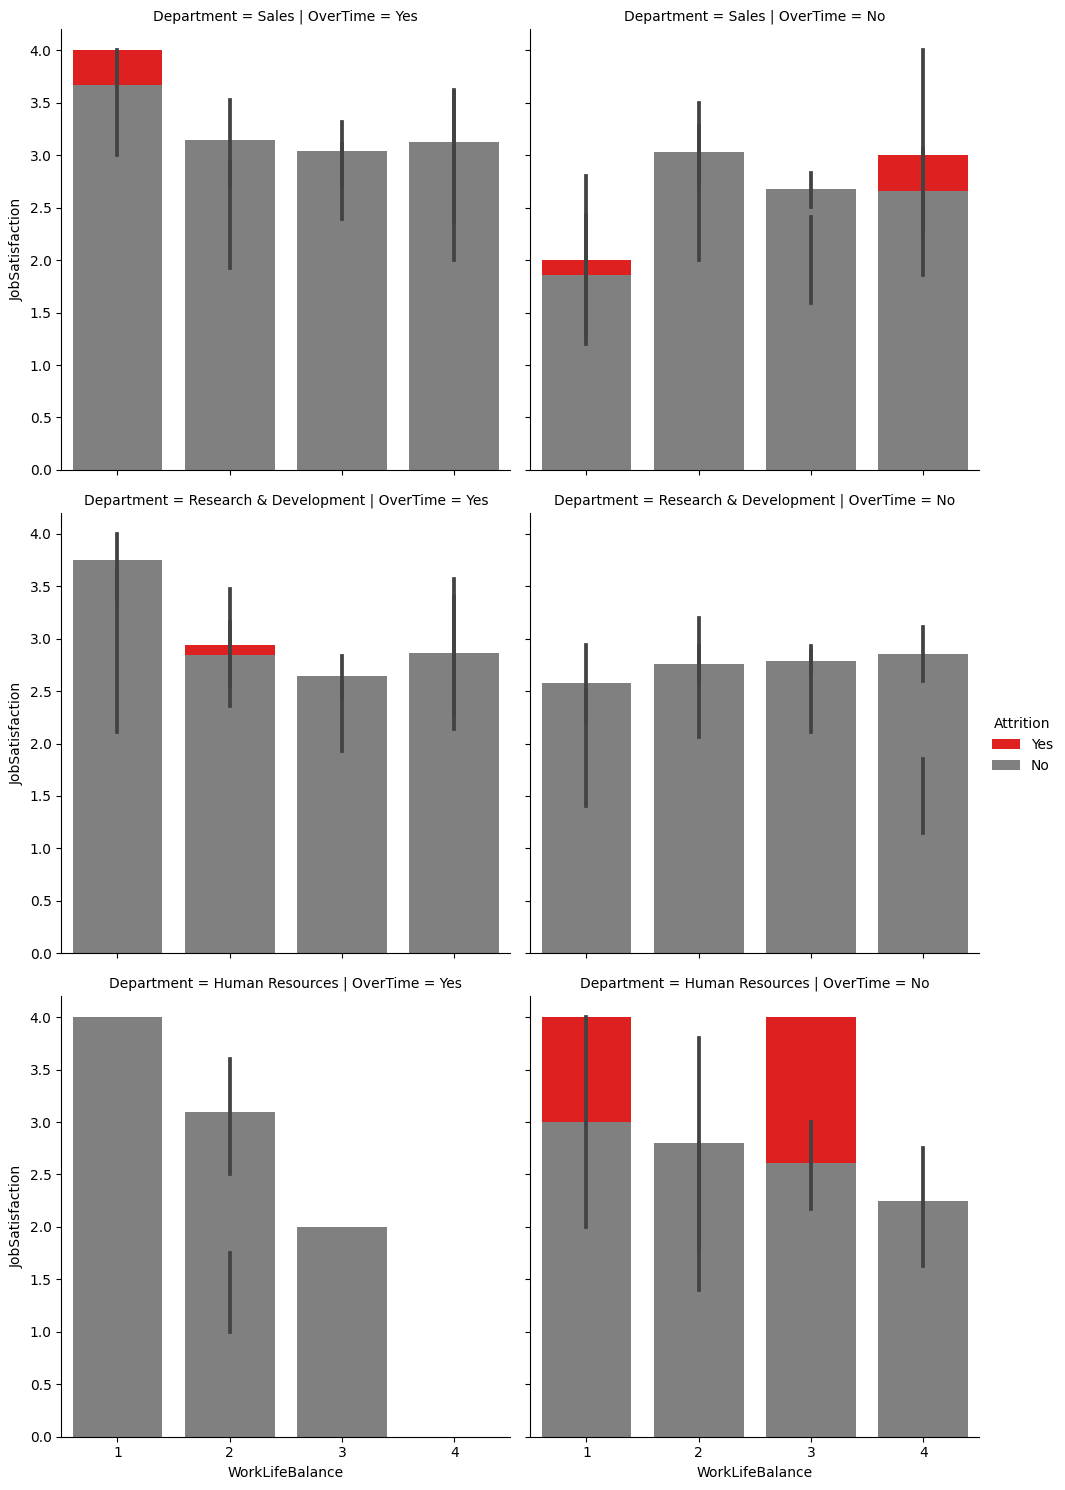

In [ ]:
facet = sns.FacetGrid(df, col='OverTime', row='Department', hue='Attrition', height=5, palette={'Yes':'red', 'No':'gray'})
facet = facet.map_dataframe(sns.barplot, x='WorkLifeBalance', y='JobSatisfaction')
facet = facet.add_legend()



---





---



# Histplot + Enumerate 반복문

<Axes: xlabel='Age', ylabel='Count'>

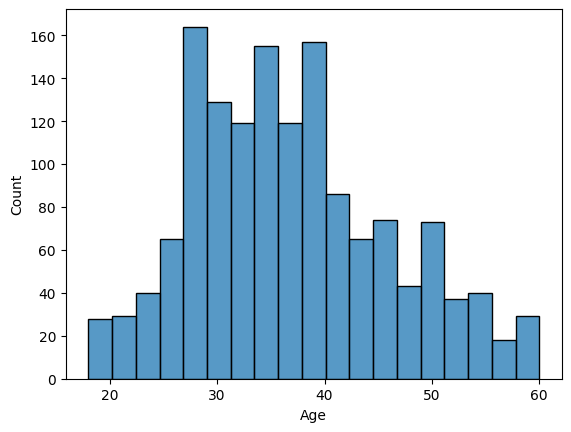

In [ ]:
sns.histplot(x=df['Age'])

In [ ]:
for i, col in enumerate(['Age', 'DistanceFromHome', 'JobSatisfaction', 'WorkLifeBalance','MonthlyIncome','YearsAtCompany']):
    print(i, col)

0 Age
1 DistanceFromHome
2 JobSatisfaction
3 WorkLifeBalance
4 MonthlyIncome
5 YearsAtCompany


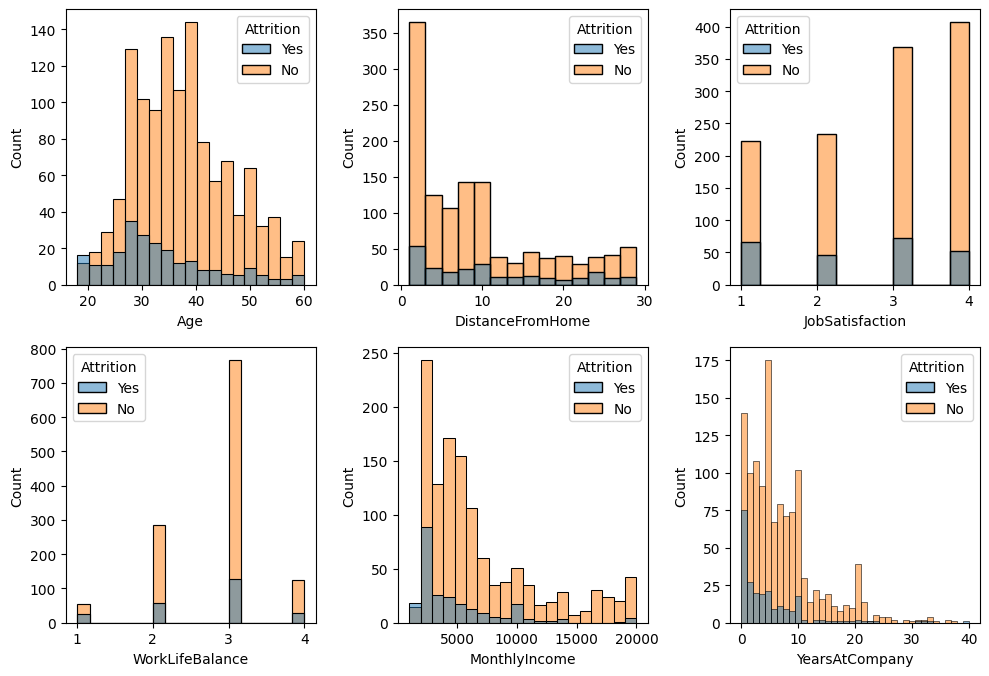

In [ ]:
hist = ['Age', 'DistanceFromHome', 'JobSatisfaction', 'WorkLifeBalance','MonthlyIncome','YearsAtCompany']

plt.figure(figsize=(10,20))
for i,col in enumerate(hist):
    axes = plt.subplot(6,3,i+1)
    sns.histplot(x=df[col], hue=df['Attrition'])
plt.tight_layout()
plt.show()



---





---



# Jointplot

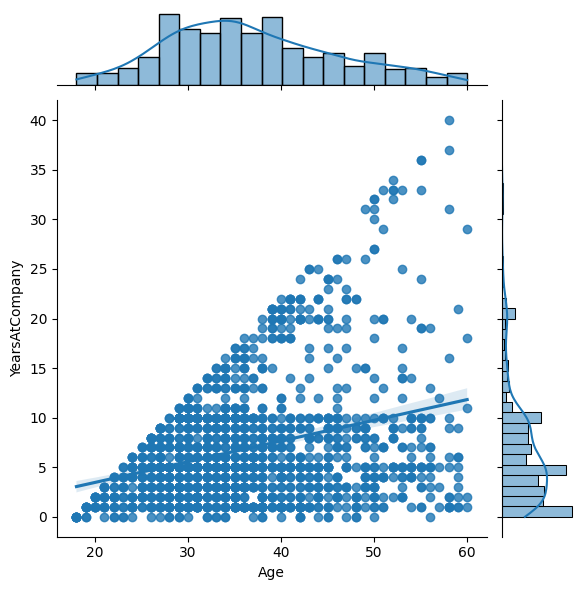

In [ ]:
sns.jointplot(df, x='Age', y='YearsAtCompany', kind='reg')

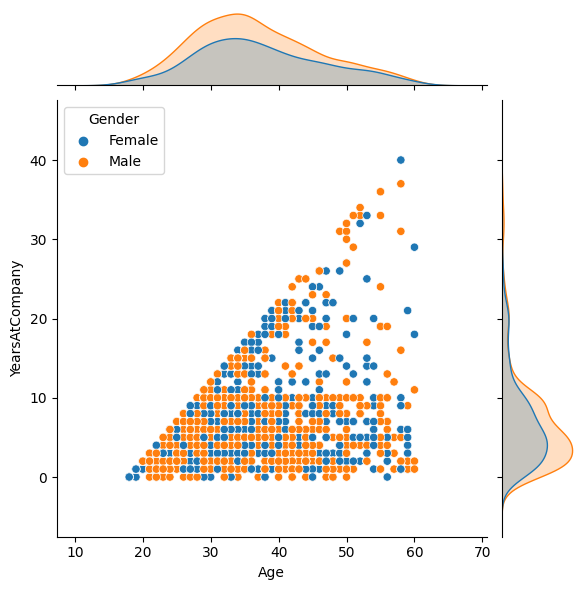

In [ ]:
sns.jointplot(df, x='Age', y='YearsAtCompany', hue='Gender')

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:2214: UserWarning: The marginal plotting function has changed to `histplot`, which does not accept the following argument(s): rug.
  warnings.warn(msg, UserWarning)


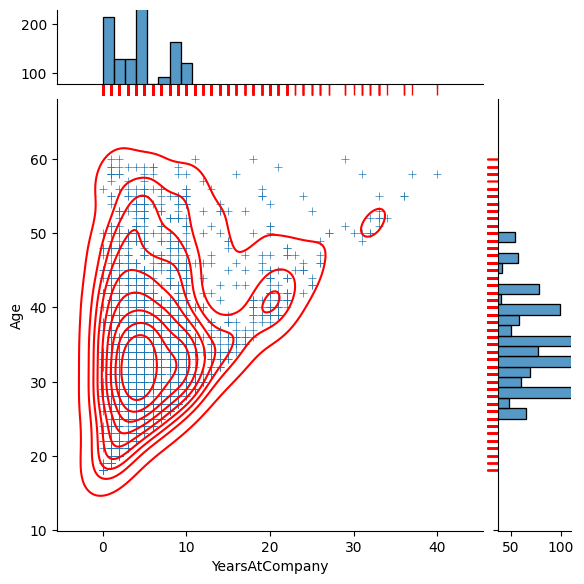

In [ ]:
j = sns.jointplot(df, x='YearsAtCompany', y='Age'
                , marker='+'
                , marginal_ticks=True
                , marginal_kws=dict(bins=30, rug=True)
                  )
j.plot_joint(sns.kdeplot, color='r')
j.plot_marginals(sns.rugplot, color='r',height=-.15, clip_on=False)